# Examine Tactus alcohol diaries

In [1]:
import datetime
import gzip
import re
import sys
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = "/home/erikt/projects/e-mental-health/usb/tmp/20190917/"
DIARYENTRYTAG = "./Diary/DiaryEntries/DiaryEntry"
DATE = "./Date"
STANDARDUNITS = "./StandardUnits"

In [3]:
data = {}
for client in range(1,1988):
    try:
        inFileName = "AdB"+str(client).zfill(4)+".xml.gz"
        inFile = gzip.open(DIRECTORY+inFileName,"rb")
        text = inFile.read()
        inFile.close()
    except: continue
    clientId = inFileName.split(".")[0]
    root = ET.fromstring(text)
    for diaryEntry in root.findall(DIARYENTRYTAG):
        date = diaryEntry.findall(DATE)[0].text.strip()
        standardUnits = diaryEntry.findall(STANDARDUNITS)[0].text.strip()
        standardUnits = re.sub(",",".",standardUnits)
        if not clientId in data: data[clientId] = {}
        if date in data[clientId]: data[clientId][date] += float(standardUnits)
        else: data[clientId][date] = float(standardUnits)

In [4]:
WEEKLEN = 7

def makeWeekData(data):
    weekData = {}
    for clientId in data:
        weekData[clientId] = {}
        dates = sorted(data[clientId].keys())
        date0 = datetime.datetime.strptime(dates[0],"%Y-%m-%d")
        for i in range(0,len(dates)):
            date1 = datetime.datetime.strptime(dates[i],"%Y-%m-%d")
            weekData[clientId][(date1-date0).days] = data[clientId][dates[i]]
            oneWeekAgo = date1+datetime.timedelta(days=-WEEKLEN)
            for j in range(1,WEEKLEN):
                if i-j >= 0:
                    date2 = datetime.datetime.strptime(dates[i-j],"%Y-%m-%d")
                    if date2 > oneWeekAgo:
                        weekData[clientId][(date1-date0).days] += data[clientId][dates[i-j]]
    return(weekData)
    
weekData = makeWeekData(data)

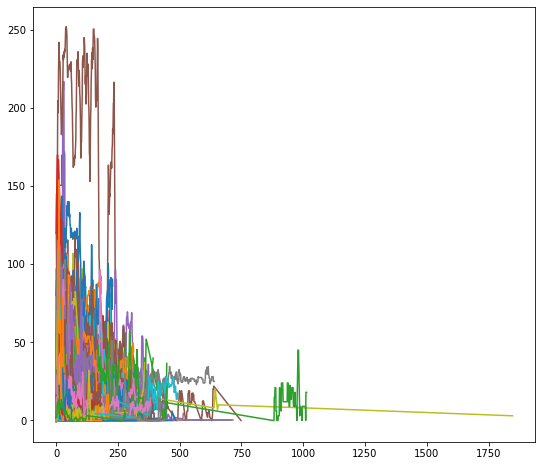

In [5]:
DATEFORMATPLOT = "%Y-%m-%d"

def stringArrayToDates(stringList,dateFormat=DATEFORMATPLOT):
    return([datetime.datetime.strptime(str(date),dateFormat) for date in stringList])

plt.figure(figsize=(9,8))
ax1 = plt.subplot(111)
for clientId in weekData:
    ax1.plot(list(weekData[clientId].keys()),list(weekData[clientId].values()),label=clientId)